# SmartRetention: Удержание клиентов на основе поведенческих данных

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и нам предстоит побыть в роли стажёра в этом отделе. 
Итак, нашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Подход к решению задачи:
1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Нужно собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

План действий: 
1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Описание данных:
1. `market_file.csv` - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
    - `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
    - `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
    - `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


2. `market_money.csv` - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    - `Выручка` — сумма выручки за период.


3. `market_time.csv` - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксировано общее время.
    - `минут` — значение времени, проведённого на сайте, в минутах.


4. `money.csv` - таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Прибыль` — значение прибыли.

Таким образом, задачу можно разбить на 2 этапа:
1. Разработать модель, которая предскажет вероятность снижения покупательской активности.
2. Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность. Использовать данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся).

## Загрузка и изучение данных

Загрузим датасеты, сохраним их в датафреймы и изучим общую информацию о данных.

In [1]:
!pip install phik
!pip install imblearn
!pip install shap

In [2]:
# Подключение всех необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка pandas для отображения полного текста
pd.set_option('display.max_colwidth', None)

# Задаем стиль графиков
sns.set(style="whitegrid")

# Фи-корреляции
from phik import phik_matrix

# Зафиксируем random_state
RANDOM_STATE = 42

# ML
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.exceptions import ConvergenceWarning

import shap

import warnings
# Отключаем FutureWarning и ConvergenceWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore')

In [3]:
market_file = pd.read_csv('/datasets/market_file.csv', delimiter=',')
market_file.sample(5)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1262,216610,Прежний уровень,стандарт,нет,4.2,4,964,0.30,Техника для красоты и здоровья,4,0,6,6
1101,216449,Прежний уровень,стандарт,да,3.6,4,618,0.24,Техника для красоты и здоровья,3,2,7,3
734,216082,Прежний уровень,стандарт,нет,4.0,3,414,0.23,Домашний текстиль,6,1,6,13
890,216238,Прежний уровень,стандарт,да,4.0,4,693,0.27,Кухонная посуда,3,0,5,4
1233,216581,Прежний уровень,стандарт,да,3.6,4,335,0.31,Техника для красоты и здоровья,5,2,6,13


In [4]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Датасет `market_file` содержит информацию о 1300 клиентах интернет-магазина, включая признаки покупательской активности, типа сервиса, маркетинговых коммуникаций, поведения на сайте и продуктового поведения. Все строки заполнены без пропусков, типы данных корректные: числовые признаки представлены в формате `int64` и `float64`, категориальные - в формате `object`.

In [5]:
market_money = pd.read_csv('/datasets/market_money.csv', delimiter=',')
market_money.sample(5)

,id,Период,Выручка
2387,216143,предыдущий_месяц,5329.0
763,215602,препредыдущий_месяц,4426.0
3451,216498,предыдущий_месяц,4351.0
2074,216039,предыдущий_месяц,4988.0
1295,215779,текущий_месяц,5379.6


In [6]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Датасет `market_money` содержит 3900 строк и отражает данные о выручке от 1300 клиентов за три разных периода, что соответствует формату "длинной таблицы". В таблице нет пропусков, а все типы данных заданы корректно.

In [7]:
market_time = pd.read_csv('/datasets/market_time.csv', delimiter=',')
market_time.sample(5)

,id,Период,минут
525,215610,текущий_месяц,8
93,215394,предыдцщий_месяц,8
345,215520,предыдцщий_месяц,11
709,215702,текущий_месяц,7
1893,216294,предыдцщий_месяц,15


In [8]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Датасет `market_time` содержит 2600 строк и представляет собой агрегированные данные о времени, проведённом клиентами на сайте, в формате "длинной таблицы" за два периода. Пропусков нет, все типы данных заданы корректно.

In [9]:
money = pd.read_csv('/datasets/money.csv', delimiter=';')
money.sample(5)

,id,Прибыль
609,215957,"5,95"
947,216295,"2,68"
701,216049,"4,87"
313,215661,"2,8"
774,216122,"0,86"


In [10]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


Датасет `money` содержит значения прибыли по 1300 клиентам за последние три месяца, пропусков нет, однако признак прибыли имеет тип `object`, что указывает на возможные проблемы с форматированием числовых значений и требует предварительной очистки.

Таким образом, мы загрузили все данные и изучили общую информацию о них.

## Предобработка данных

### Работа со столбцами

Преобразуем имена столбцов датафрейма в змеиный формат.

In [11]:
# Функция для преобразования имен столбцов к змеиному формату
def to_snake_case(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    print(df.columns)
    return df

In [12]:
# Применяем ко всем датафреймам
market_file = to_snake_case(market_file)
market_money = to_snake_case(market_money)
market_time = to_snake_case(market_time)
money = to_snake_case(money)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


- Пробелы заменены на нижнее подчеркивание,
- Все буквы приведены к нижнему регистру,
- Структура колонок осталась без искажений.

Все типы данных в датафреймах заданы корректно, кроме одного. <br>
В датафрейме `money` необходимо изменить тип данных столбца `прибыль` на `float`.

In [13]:
# Преобразование прибыли в числовой формат
money['прибыль'] = money['прибыль'].str.replace(',', '.', regex=False).str.replace(' ', '', regex=False)
money['прибыль'] = money['прибыль'].astype(float)

# Проверка результата
money['прибыль'].head()

0    0.98
1    4.16
2    3.13
3    4.87
4    4.21
Name: прибыль, dtype: float64

На этом работу со столбцами считаем выполненной.

### Работа с пропусками

Проверим пропуски явно.

In [14]:
# Функция для проверки пропусков в датафрейме
def check_missing_values(df, name):
    print(f'Пропуски в {name}:')
    print(df.isnull().sum())
    print()

In [15]:
check_missing_values(market_file, 'market_file')
check_missing_values(market_money, 'market_money')
check_missing_values(market_time, 'market_time')
check_missing_values(money, 'money')

Пропуски в market_file:
id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

Пропуски в market_money:
id         0
период     0
выручка    0
dtype: int64

Пропуски в market_time:
id        0
период    0
минут     0
dtype: int64

Пропуски в money:
id         0
прибыль    0
dtype: int64



Пропусков не обнаружено.

### Работа с дубликатами

In [16]:
# Функция для проверки явных дубликатов
def check_duplicates(df, name):
    duplicates = df.duplicated().sum()
    print(f'Явные дубликаты в {name}: {duplicates}')

In [17]:
check_duplicates(market_file, 'market_file')
check_duplicates(market_money, 'market_money')
check_duplicates(market_time, 'market_time')
check_duplicates(money, 'money')

Явные дубликаты в market_file: 0
Явные дубликаты в market_money: 0
Явные дубликаты в market_time: 0
Явные дубликаты в money: 0


Явных дублей не обнаружено. Неявные дубли в данных допустимы, так как формат таблиц `market_money` и `market_time` предполагает многократные значения `id` для разных периодов. Повторения по `id` в этом случае могут отражать структуру данных, а не ошибку.

На этапе предобработки были приведены имена столбцов всех таблиц к единому стилю (змеиный регистр), приведён признак прибыли к числовому формату, а также проведены проверки на пропуски и явные дубликаты – ни пропусков, ни дубликатов в данных не обнаружено.

## Исследовательский анализ данных

Проведем исследовательский анализ данных из каждой таблицы. Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [18]:
# Универсальная функция EDA
def explore_dataframe(df, name):
    print(f'--- Анализ таблицы: {name} ---\n')

    # Исключаем id из анализа
    df = df.drop(columns=['id'], errors='ignore')

    # Разделение признаков
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Выделение дискретных числовых признаков (целочисленные с <= 20 уникальными значениями)
    discrete_cols = [col for col in numeric_cols if pd.api.types.is_integer_dtype(df[col]) and df[col].nunique() <= 20]
    continuous_cols = [col for col in numeric_cols if col not in discrete_cols]

    # Числовые признаки
    print('Числовые признаки:\n')
    display(df[numeric_cols].describe().T)
    print()

    # Категориальные признаки
    print('Категориальные признаки:\n')
    cat_stats = []
    for col in categorical_cols:
        mode_val = df[col].mode()[0] if not df[col].mode().empty else None
        cat_stats.append({
            'Признак': col,
            'Уникальных значений': df[col].nunique(),
            'Мода': mode_val
        })
    display(pd.DataFrame(cat_stats))
    print()

    # Построение графиков
    def plot_distributions(cols, plot_type, title):
        n = len(cols)
        rows = (n + 2) // 3
        fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
        axes = axes.flatten()

        for i, col in enumerate(cols):
            if plot_type == 'numeric':
                sns.histplot(df[col], kde=True, ax=axes[i])
            else:
                sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
                axes[i].tick_params(axis='x', rotation=45)
            axes[i].set_title(col)

        # Удаление лишних подграфиков
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        fig.suptitle(f'{title} ({name})', fontsize=16)
        plt.tight_layout()
        plt.show()

    if len(continuous_cols) > 0:
        plot_distributions(continuous_cols, 'numeric', 'Распределение непрерывных числовых признаков')

    if len(discrete_cols + categorical_cols) > 0:
        plot_distributions(discrete_cols + categorical_cols, 'categorical', 'Распределение дискретных и категориальных признаков')

### market_file

--- Анализ таблицы: market_file ---

Числовые признаки:



,count,mean,std,min,25%,50%,75%,max
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.9,6.60
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.0,5.00
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.0,1079.00
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.3,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.0,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.0,10.00
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.0,9.00
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.0,20.00



Категориальные признаки:



,Признак,Уникальных значений,Мода
0,покупательская_активность,2,Прежний уровень
1,тип_сервиса,3,стандарт
2,разрешить_сообщать,2,да
3,популярная_категория,6,Товары для детей


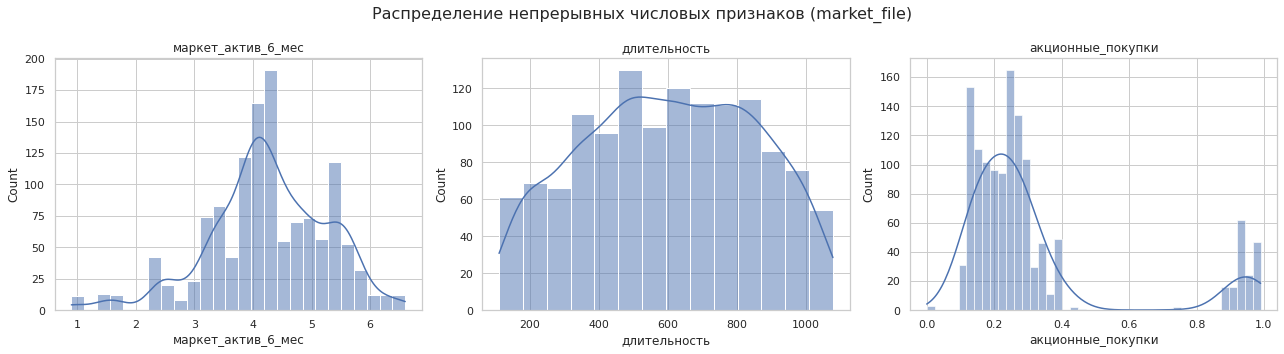

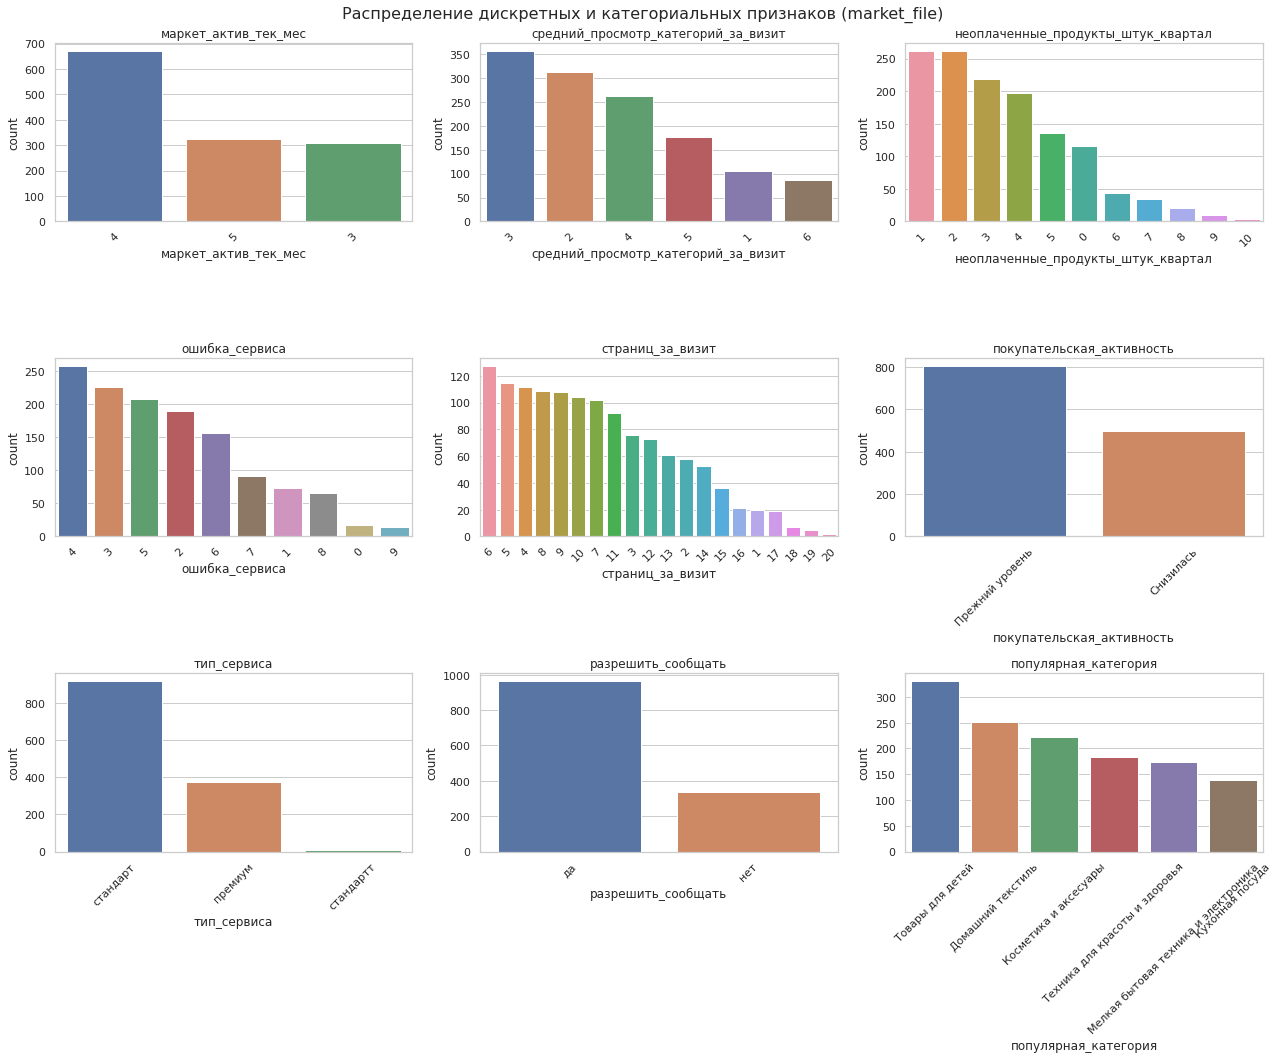

In [19]:
explore_dataframe(market_file, 'market_file')

Дублирующее значение 'стандартт' (с лишней буквой "т") - это явная опечатка и её нужно заменить на 'стандарт'. Остальные значения выглядят корректно.

In [20]:
# Исправление опечатки в типе сервиса
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')

# Проверка результата: уникальные значения после замены
print('Уникальные значения в тип_сервиса после замены:')
market_file['тип_сервиса'].unique()

Уникальные значения в тип_сервиса после замены:


array(['премиум', 'стандарт'], dtype=object)

Анализ таблицы `market_file` показал, что данные в целом корректны, выбросов не выявлено. Числовые признаки находятся в допустимых диапазонах, распределения разумны, крайние значения (например, доля акционных покупок 0 или 1) отражают реальные поведенческие стратегии клиентов. Среди категориальных признаков была обнаружена опечатка в значении «стандартт» столбца `тип_сервиса`, она заменена на корректное «стандарт». Целевая переменная умеренно несбалансирована, что следует учитывать при построении модели.

### market_money

--- Анализ таблицы: market_money ---

Числовые признаки:



,count,mean,std,min,25%,50%,75%,max
выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.0,106862.2



Категориальные признаки:



,Признак,Уникальных значений,Мода
0,период,3,предыдущий_месяц


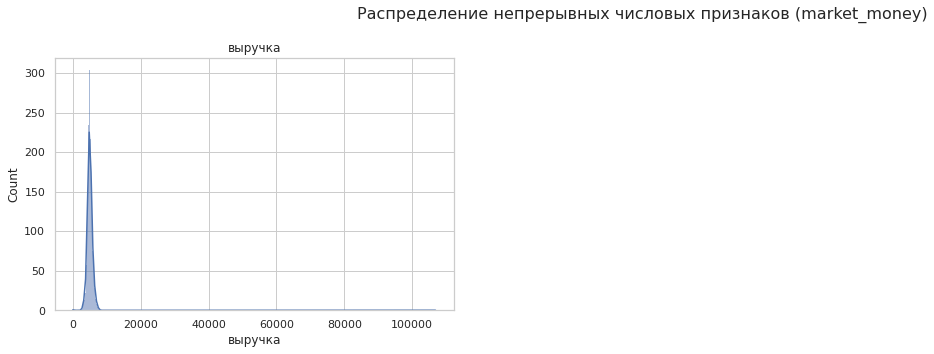

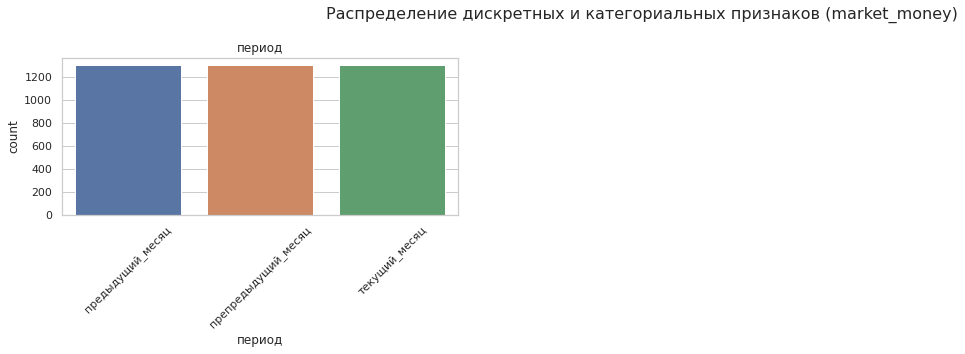

In [21]:
explore_dataframe(market_money, 'market_money')

В распределении выручки наблюдается выброс, проанализируем.

In [22]:
# Отбираем только текущий месяц
current_month = market_money[market_money['период'] == 'текущий_месяц']

# Вычисляем IQR (межквартильный размах)
Q1 = current_month['выручка'].quantile(0.25)
Q3 = current_month['выручка'].quantile(0.75)
IQR = Q3 - Q1

# Устанавливаем верхнюю границу как Q3 + 3*IQR
upper_bound = Q3 + 3 * IQR

# Маска выбросов
mask_outliers = (current_month['выручка'] > upper_bound)

# Получаем ID с выбросами
outlier_ids = current_month.loc[mask_outliers, 'id'].unique()

# Вывод результатов
print(f'Граница выбросов по IQR: {upper_bound:.2f}')
print(f'Количество выбросов: {mask_outliers.sum()}')
print(f'ID с выбросами:\n{outlier_ids}')

Граница выбросов по IQR: 8928.75
Количество выбросов: 1
ID с выбросами:
[215380]


Посмотрим внимательнее этот `id`.

In [23]:
# Посмотрим все периоды для этого клиента в таблице выручки
market_money[market_money['id'].isin(outlier_ids)]

,id,период,выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


In [24]:
# Посмотрим клиента в таблице поведения
market_file[market_file['id'].isin(outlier_ids)]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7


Тип сервиса - премиум, что потенциально может объяснять высокие чеки, но всё равно не в такой степени. То есть это либо ошибка ввода (лишние нули или запятая), либо единичная операция, нехарактерная для анализа поведения. Лучше это наблюдение ограничить сверху, чтобы не терять полностью.

In [25]:
# Сохраняем "сырую" копию
market_money_raw = market_money.copy()

# Заменяем выброс в оригинале
market_money.loc[
    (market_money['id'].isin(outlier_ids)) &
    (market_money['период'] == 'текущий_месяц'),
    'выручка'
] = upper_bound

# Проверка — убедимся, что замена сработала
market_money[market_money['id'].isin(outlier_ids)]

,id,период,выручка
96,215380,препредыдущий_месяц,5051.00
97,215380,предыдущий_месяц,6077.00
98,215380,текущий_месяц,8928.75


--- Анализ таблицы: market_money ---

Числовые признаки:



,count,mean,std,min,25%,50%,75%,max
выручка,3900.0,5000.58491,709.703596,0.0,4590.15,4957.5,5363.0,8928.75



Категориальные признаки:



,Признак,Уникальных значений,Мода
0,период,3,предыдущий_месяц


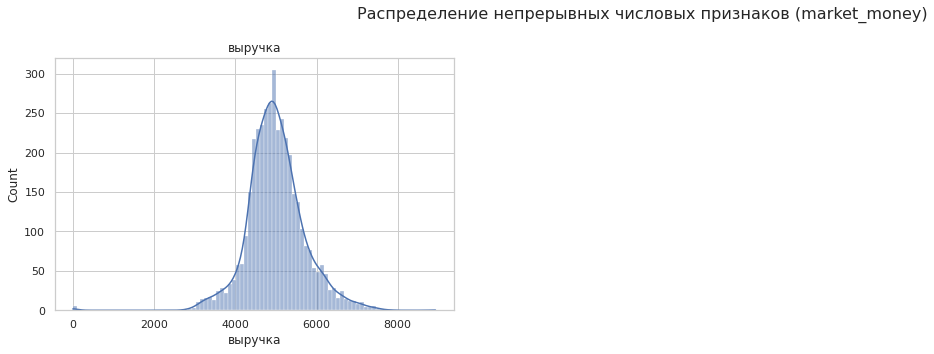

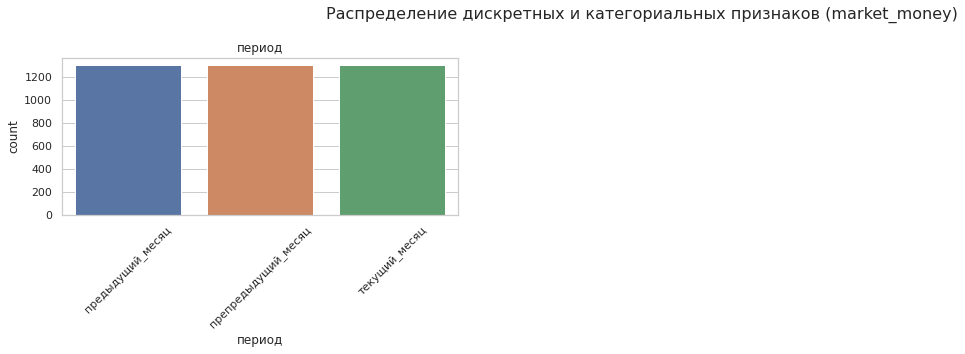

In [26]:
explore_dataframe(market_money, 'market_money')

Анализ таблицы `market_money` показал, что данные охватывают три последовательных месяца для всех клиентов, распределение выручки близко к нормальному и сосредоточено в диапазоне 4000-6000. Один аномально высокий чек был выявлен и скорректирован вручную до допустимого значения, после чего распределение стало гладким и реалистичным.

### market_time

--- Анализ таблицы: market_time ---

Числовые признаки:



,count,mean,std,min,25%,50%,75%,max
минут,2600.0,13.336154,4.080198,4.0,10.0,13.0,16.0,23.0



Категориальные признаки:



,Признак,Уникальных значений,Мода
0,период,2,предыдцщий_месяц


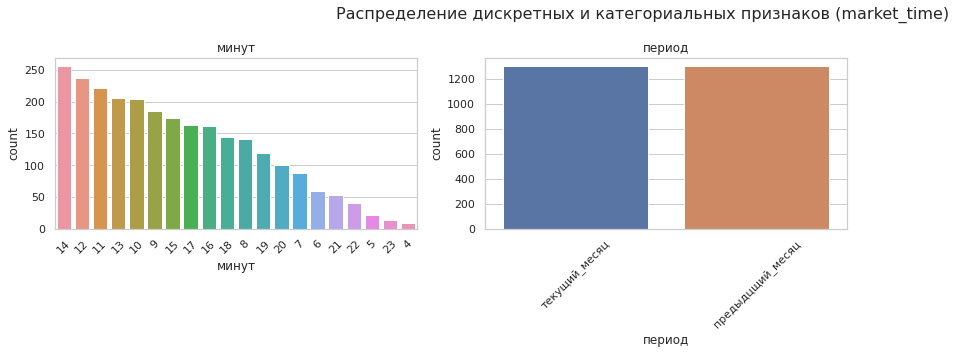

In [27]:
explore_dataframe(market_time, 'market_time')

Исправим опечатку.

In [28]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

Анализ таблицы `market_time` показал, что данные охватывают два последних месяца для всех клиентов. Распределение времени, проведённого на сайте, симметрично и сосредоточено в диапазоне от 10 до 16 минут, что соответствует нормальному пользовательскому поведению. Значения категориального признака `период` корректны и сбалансированы.

### money

--- Анализ таблицы: money ---

Числовые признаки:



,count,mean,std,min,25%,50%,75%,max
прибыль,1300.0,3.996631,1.013722,0.86,3.3,4.045,4.67,7.43



Категориальные признаки:



""


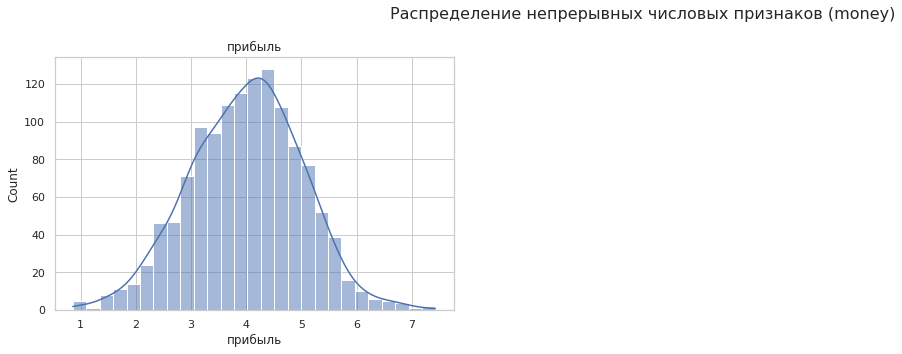

In [29]:
explore_dataframe(money, 'money')

Анализ таблицы `money` показал, что значения прибыли клиентов распределены нормально, без выбросов и технических аномалий. Диапазон значений составляет от 0.86 до 7.43, медиана - около 4, что указывает на умеренную вариативность прибыльности клиентов. Данные полностью пригодны для дальнейшего использования в сегментации и моделировании.

### Отбор клиентов

Отберем клиентов с покупательской активностью не менее трёх месяцев.

In [30]:
# Отбор только строк с ненулевой выручкой
non_zero_revenue = market_money[market_money['выручка'] > 0]

# Подсчёт числа активных месяцев по каждому клиенту
active_counts = non_zero_revenue.groupby('id')['период'].nunique()

# Оставляем только тех, у кого активность в 3 разных месяцах
active_ids = active_counts[active_counts == 3].index

# фильтрация по этому списку
active_clients = market_file[market_file['id'].isin(active_ids)]

In [31]:
print(f'Число клиентов с покупками в каждом из трёх месяцев: {len(active_ids)}')
print(f'Доля таких клиентов: {len(active_ids) / market_file.shape[0]:.2%}')

Число клиентов с покупками в каждом из трёх месяцев: 1297
Доля таких клиентов: 99.77%


В ходе исследовательского анализа данных были изучены все четыре таблицы, отражающие поведение, выручку, время на сайте и прибыль клиентов. Данные оказались чистыми, без пропусков и технических ошибок, за исключением одного выброса в выручке, который был скорректирован вручную. Распределения числовых признаков в целом нормальные или умеренно скошенные, категориальные признаки содержат допустимо неравномерные распределения, не требующие вмешательства. Отдельно был выполнен отбор клиентов, совершавших покупки в каждом из трёх последних месяцев: таких оказалось 1297 человек (99.77% выборки).

## Объединение таблиц

Объединим таблицы `market_file`, `market_money`, `market_time`. Данные о прибыли из файла `money.csv` при моделировании нам не понадобятся. Учитем, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода.

In [32]:
# Pivot: делаем по одному столбцу на каждый период
money_wide = market_money.pivot(index='id', columns='период', values='выручка')
money_wide.columns = [f'выручка_{col}' for col in money_wide.columns]
money_wide = money_wide.reset_index()

time_wide = market_time.pivot(index='id', columns='период', values='минут')
time_wide.columns = [f'время_{col}' for col in time_wide.columns]
time_wide = time_wide.reset_index()

# Объединение с market_file
df_merged = market_file.merge(money_wide, on='id', how='left')
df_merged = df_merged.merge(time_wide, on='id', how='left')

df_merged.sample(5)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
1241,216589,Прежний уровень,стандарт,да,4.1,5,447,0.14,Косметика и аксесуары,6,0,9,12,5430.5,5045.0,5894.6,20,17
533,215881,Прежний уровень,стандарт,да,5.1,3,709,0.30,Товары для детей,5,1,6,9,5084.0,4786.0,4955.3,17,13
208,215556,Снизилась,стандарт,нет,2.7,4,742,0.39,Товары для детей,2,2,3,5,5891.0,4640.0,6530.6,7,8
611,215959,Прежний уровень,стандарт,да,3.6,3,825,0.20,Домашний текстиль,5,1,4,10,5346.5,5021.0,5758.6,13,11
276,215624,Снизилась,премиум,нет,2.4,4,399,0.35,Косметика и аксесуары,2,4,3,3,5009.0,4646.0,4439.6,7,15


In [33]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

Объединение прошло успешно:
- 1300 строк - все клиенты на месте, пропусков нет.
- 18 столбцов - объединены данные из всех источников.
- Типы данных корректны: числовые (`int64`, `float64`) и категориальные (`object`) разделены логично.

Отфильтруем неактивных пользователей.

In [34]:
# Получаем список активных id
active_ids = active_clients['id'].unique()

# Фильтруем итоговую таблицу по этим id
df_merged = df_merged[df_merged['id'].isin(active_ids)].reset_index(drop=True)

# Проверим размер и первые строки
print(f'Размер df_merged после фильтрации: {df_merged.shape}')
display(df_merged.head())

Размер df_merged после фильтрации: (1297, 18)


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


## Корреляционный анализ

Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделаем выводы о мультиколлинеарности и при необходимости устраним её.

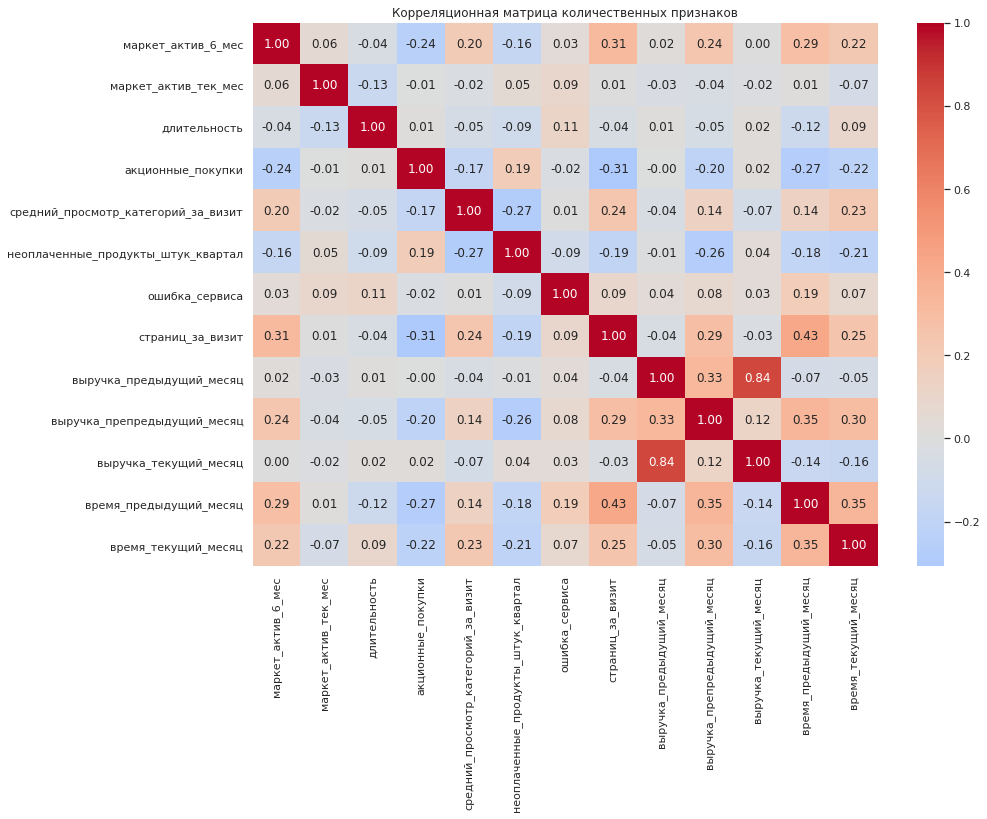

In [35]:
# Отбираем числовые признаки (без id)
numeric_cols = df_merged.select_dtypes(include=['int64', 'float64']).drop(columns='id')

# Строим корреляционную матрицу
corr_matrix = numeric_cols.corr()

# Визуализация тепловой карты
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Корреляционная матрица количественных признаков')
plt.show()

Корреляционный анализ количественных признаков показал отсутствие выраженной мультиколлинеарности. Наибольшая взаимосвязь наблюдается между признаками выручки за разные месяцы, однако уровень корреляции (до 0.84) остаётся в допустимых пределах и отражает естественную стабильность покупательского поведения. Удаление признаков или их агрегация не требуется, все числовые признаки сохраняются без изменений.

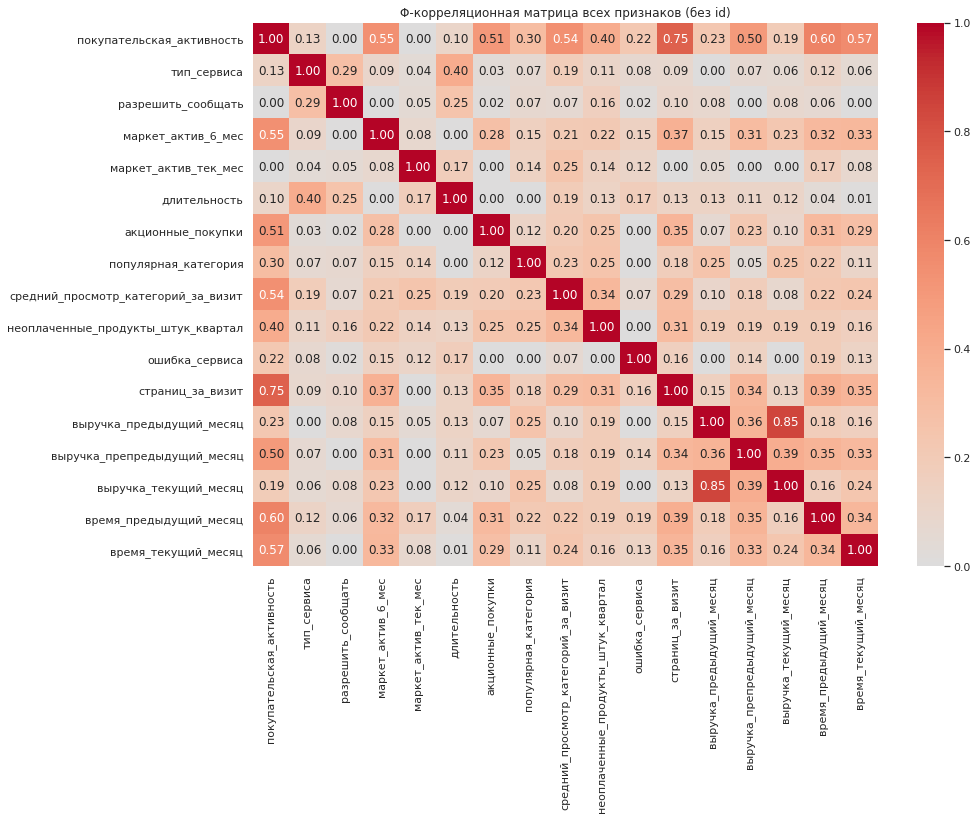

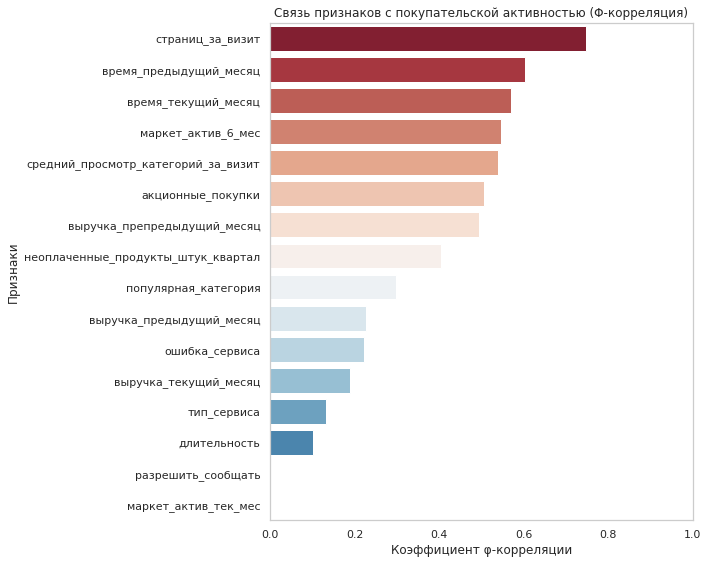

In [36]:
# Исключаем id перед расчётом корреляции
df_for_phik = df_merged.drop(columns='id')

# Определяем интервальные (непрерывные) признаки вручную
interval_cols = [
    'маркет_актив_6_мес',
    'длительность',
    'акционные_покупки',
    'выручка_препредыдущий_месяц',
    'выручка_предыдущий_месяц',
    'выручка_текущий_месяц'
]

# Пересчёт φ-матрицы с корректными интервальными признаками
phi_corr = df_for_phik.phik_matrix(interval_cols=interval_cols)

# Визуализация полной φ-матрицы
plt.figure(figsize=(14, 10))
sns.heatmap(phi_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Φ-корреляционная матрица всех признаков (без id)')
plt.show()

# Выделение корреляций с целевым признаком
phi_with_target = phi_corr['покупательская_активность'].drop('покупательская_активность').sort_values(ascending=False)

# Barplot
plt.figure(figsize=(10, 8))
sns.barplot(
    x=phi_with_target.values,
    y=phi_with_target.index,
    palette='RdBu'
)
plt.title('Связь признаков с покупательской активностью (Φ-корреляция)')
plt.xlabel('Коэффициент φ-корреляции')
plt.ylabel('Признаки')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Анализ φ-корреляции показал, что наибольшую связь с целевым признаком (снижением покупательской активности) имеют признаки, связанные с вовлечённостью пользователя: количество просмотренных страниц за визит, проведённое на сайте время, а также уровень маркетингового воздействия за последние 6 месяцев. Значимыми также оказались поведенческие и продуктовые характеристики, такие как среднее количество просмотренных категорий, доля акционных покупок и число неоплаченных товаров в корзине. Наименьшую связь с целевым признаком продемонстрировали признаки, отражающие текущее маркетинговое воздействие, согласие на коммуникации и длительность истории взаимодействия с клиентом. Выявленные зависимости могут быть использованы для выбора признаков или их приоритизации при моделировании.

## Использование пайплайнов

Для решения задачи предсказания снижения покупательской активности клиентов протестируем четыре алгоритма машинного обучения: `LogisticRegression`, `DecisionTreeClassifier`, `KNeighborsClassifier` и `SVC`. Для предварительной обработки признаков применены пайплайны, объединённые в общий сквозной процесс с помощью `Pipeline` и `GridSearchCV`.

В качестве метрики выбрана F1 для положительного класса («снизилась»), так как задача модели - своевременно и точно выявлять клиентов с признаками снижения активности. Классы умеренно несбалансированы, и важно не только точное предсказание, но и полнота для класса «снизилась», чтобы минимизировать количество упущенных клиентов с падающим интересом. F1-мера позволяет сбалансировать эти две характеристики (precision и recall) и даёт целостную оценку качества модели именно для целевого события.

Перед обучением моделей признаки разделяем на числовые и категориальные, чтобы применить к ним соответствующие методы масштабирования и кодирования в `ColumnTransformer`.

In [37]:
# Категориальные признаки (все object)
cat_features = df_merged.select_dtypes(include='object').drop(columns='покупательская_активность').columns.tolist()
print(cat_features)

# Числовые признаки
num_features = df_merged.select_dtypes(include=['int64', 'float64']).drop(columns='id').columns.tolist()

# Целевой признак
target_col = 'покупательская_активность'

['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']


In [38]:
ohe_features = ['популярная_категория']
ord_features = ['тип_сервиса', 'разрешить_сообщать']

Разбиение данных.

In [39]:
X = df_merged.drop(columns=[target_col])
y = df_merged[target_col]

Целевая переменная преобразована в бинарный формат: 1 - снижение активности, 0 - её сохранение. Это необходимо для обучения моделей классификации.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

# Кодируем таргет обучаемым трансформером
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Базовые пайплайны. Для категориальных признаков используем два варианта кодирования: `OneHotEncoder` и `OrdinalEncoder`. Для числовых - два способа масштабирования: `StandardScaler` и `MinMaxScaler`. Это позволяет протестировать разные комбинации обработки признаков в рамках подбора параметров. А также 2 сэмплера - `SMOTE` и `SMOTETomek`.

In [41]:
# OHE-кодирование
ohe_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Ordinal-кодирование
ord_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

scalers = [StandardScaler(), MinMaxScaler()] # Масштабирование

Общий `ColumnTransformer` (будет перезаписываться в `param_grid`).

In [42]:
# Сэмплеры
samplers = [
    'passthrough',
    SMOTE(random_state=RANDOM_STATE),
    SMOTETomek(random_state=RANDOM_STATE)
]

In [43]:
# Предобработка (заглушка)
preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_features),
    ('ord', ord_pipe, ord_features),
    ('num', StandardScaler(), num_features)
])

Итоговый `pipeline`.

In [44]:
pipe = ImbPipeline([
    ('preprocessor', preprocessor),
    ('sampling', 'passthrough'),
    ('model', LogisticRegression(random_state=RANDOM_STATE))
])

Определим всю сетку с методами с гиперпараметрами.

In [45]:
param_grid = [

    # Logistic Regression
    {
        'model': [LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)],
        'model__penalty': ['l1', 'l2'],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'preprocessor__ohe': [ohe_pipe],
        'preprocessor__ord': [ord_pipe],
        'preprocessor__num': scalers,
        'sampling': samplers
    },

    # Decision Tree
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': [3, 5, 7, 10, None],
        'model__min_samples_split': [2, 5, 10],
        'model__max_features': ['sqrt', 'log2', None],
        'preprocessor__ohe': [ohe_pipe],
        'preprocessor__ord': [ord_pipe],
        'preprocessor__num': scalers,
        'sampling': samplers
    },

    # KNeighbors
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['minkowski', 'euclidean', 'manhattan'],
        'preprocessor__ohe': [ohe_pipe],
        'preprocessor__ord': [ord_pipe],
        'preprocessor__num': scalers,
        'sampling': samplers
    },

    # SVC
    {
        'model': [SVC(probability=True, random_state=RANDOM_STATE)],
        'model__C': [0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf', 'poly'],
        'model__gamma': ['scale', 'auto'],
        'model__degree': [2, 3, 4],
        'preprocessor__ohe': [ohe_pipe],
        'preprocessor__ord': [ord_pipe],
        'preprocessor__num': scalers,
        'sampling': samplers
    }
]

Подбор модели и гиперпараметров осуществим с помощью `GridSearchCV`, в котором в качестве параметров перебираются: 
- тип модели
- значения ключевых гиперпараметров
- способ кодирования категориальных признаков
- способ масштабирования числовых признаков
- сэмплирование

Все комбинации оценим по F1 на 5-кратной кросс-валидации.

In [46]:
# Используем StratifiedKFold из-за дисбаланса классов
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring=make_scorer(f1_score),
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['популярная_категория']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('imputer'...
                                                                 OneHotEncoder(handle_unknown='ignore',
                                                                               sparse_output=False))])],
                          'preprocessor__ord': [Pipeline(steps=[('imputer',
                                                                 SimpleImputer(strategy='most_frequent')),
                                                                ('ord',
                                                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                unknown_value=-1))])],
                          'sampling': ['passthrough', SMOTE(random_state=42),
                                       SMOTETomek(random_state=42)]}],
             scoring=make_scorer(f1_score, response_method='predict'))

In [47]:
print('Лучшая модель:\n', grid.best_estimator_)
print('F1 (CV):', grid.best_score_)

Лучшая модель:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                          

Проверим модель на тестовой выборке.

In [48]:
y_pred = grid.predict(X_test)
print('F1 (test):', f1_score(y_test, y_pred))

F1 (test): 0.864406779661017



Отчёт классификации:

                 precision    recall  f1-score   support

Прежний уровень       0.90      0.95      0.92       201
      Снизилась       0.91      0.82      0.86       124

       accuracy                           0.90       325
      macro avg       0.90      0.89      0.89       325
   weighted avg       0.90      0.90      0.90       325



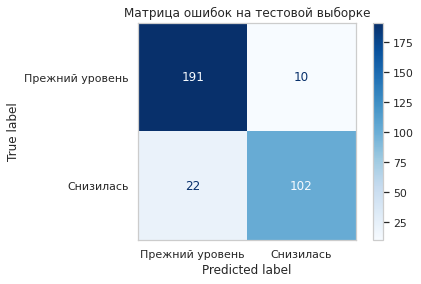

In [49]:
print('\nОтчёт классификации:\n')
print(classification_report(y_test, y_pred, target_names=['Прежний уровень', 'Снизилась']))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Прежний уровень', 'Снизилась'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица ошибок на тестовой выборке')
plt.grid(False)
plt.show()

Лучшей моделью по итогам перебора стал классификатор K-Nearest Neighbors с числом соседей 9, метрикой `manhattan` и весами `distance`. В качестве предобработки использовались `OneHotEncoder` для категориальных признаков и `StandardScaler` для числовых. Модель достигла F1 0.85 на кросс-валидации и 0.86 на тестовой выборке, продемонстрировав стабильность качества на разных подвыборках. На тесте модель показала высокую точность предсказания обоих классов, с особенно высоким recall (0.95) у клиентов с прежним уровнем активности. Основная часть ошибок связана с тем, что часть клиентов со сниженной активностью (18% в этом классе) была отнесена к группе с неизменной активностью, что важно учитывать при построении бизнес-интерпретаций.

На этапе машинного обучения была реализована единая система отбора модели и предобработки данных с использованием пайплайнов. Подход с применением `GridSearchCV` обеспечил сравнение множества комбинаций алгоритмов, кодировщиков, масштабирований и методов борьбы с дисбалансом. В результате удалось выявить устойчивое решение с высокой F1 метрикой. Классификатор продемонстрировал хорошее качество как по точности, так и по полноте, особенно в отношении клиентов с сохранённой активностью. Ошибки предсказания снижения активности допускаются в ограниченном числе случаев и поддаются последующему бизнес-анализу.

## Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. 

  0%|          | 0/50 [00:00<?, ?it/s]

(50, 21)


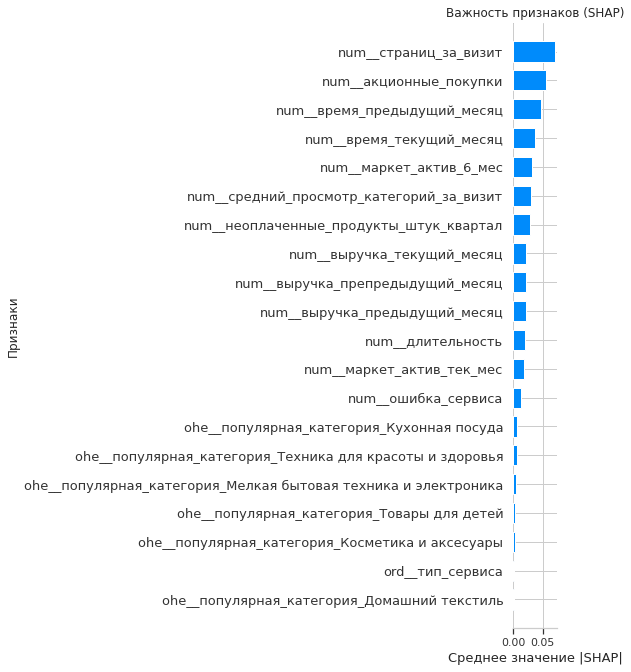

In [50]:
# Получаем лучший пайплайн
best_model = grid.best_estimator_

# Преобразуем X_train
X_transformed = best_model.named_steps['preprocessor'].transform(X_train)
model = best_model.named_steps['model']
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Берём подвыборку
X_sample = X_transformed[:50]

# Используем predict
explainer = shap.KernelExplainer(model.predict, X_sample)
shap_values = explainer.shap_values(X_sample)

# Проверим форму
print(np.array(shap_values).shape)  # должно быть (50, n_features)

# Строим график SHAP (барплот важности)
shap.summary_plot(
    shap_values,
    X_sample,
    feature_names=feature_names,
    plot_type='bar',
    show=False  # отключаем автоматическое отображение
)

# Настраиваем через matplotlib
plt.title('Важность признаков (SHAP)')
plt.xlabel('Среднее значение |SHAP|')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()

Наиболее важные признаки:
- `num__страниц_за_визит` - оказывает наибольшее влияние на решение модели: чем больше страниц просматривает клиент, тем выше вероятность, что его активность сохраняется.
- `num__время_текущий_месяц` и `num__время_предыдущий_месяц` - отражают вовлечённость в текущем периоде; снижение времени - маркер убывающей активности.
- `num__средний_просмотр_категорий_за_визит` - чем больше категорий изучает пользователь, тем выше интерес к ассортименту.
- `num__неоплаченные_продукты_штук_квартал` - может сигнализировать о неудовлетворённости или нерешительности клиента.


Менее значимые признаки:
- Некоторые категориальные признаки, например `ord__тип_сервиса` или `ohe__популярная_категория_Товары для детей`, почти не влияют на предсказание модели. Это может указывать на то, что тип сервиса или предпочтения по категориям не так важны для определения активности.

Как использовать для бизнеса:
- Модель акцентирует внимание на поведенческих метриках - как долго и активно клиент пользуется сайтом, что важно для сегментации.
- Наименее значимые признаки можно удалить на следующих этапах, чтобы упростить модель или улучшить её интерпретируемость.
- Самые важные признаки можно использовать как триггеры персональных рекомендаций или ретаргетинга - например, если падает число просмотренных страниц, можно инициировать маркетинговое вмешательство.



## Сегментация покупателей

Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей.

Добавим в исходные данные:
1. предсказанную вероятность снижения активности (из `model.predict_proba`);
2. признак "снизится активность" - бинарное предсказание;
3. прибыльность из таблицы `money`.

In [51]:
# Предсказания вероятностей
y_pred_proba = grid.predict_proba(X_test)[:, 1]  # вероятность "снизилась"
y_pred_label = grid.predict(X_test)

# Создаём таблицу с ID из X_test
df_preds = X_test.copy()
df_preds['вероятность_снижения'] = y_pred_proba
df_preds['предсказание_снижения'] = y_pred_label
df_preds['истинная_активность'] = y_test

# Присоединяем прибыльность
df_preds = df_preds.merge(money, on='id', how='left')  # df_preds должен содержать 'id'

# Смотрим, всё ли ок
display(df_preds.head())
print(df_preds.shape)

,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,...,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц,вероятность_снижения,предсказание_снижения,истинная_активность,прибыль
0,216446,стандарт,да,5.3,5,433,0.91,Техника для красоты и здоровья,1,1,...,7,4712.0,5160.0,5230.7,15,20,0.518017,1,0,4.47
1,215469,премиум,да,4.1,3,813,0.22,Домашний текстиль,3,3,...,5,5403.5,4889.0,5228.0,12,8,0.572173,1,1,3.76
2,216301,премиум,да,3.9,5,410,0.20,Косметика и аксесуары,3,1,...,14,5052.5,5348.0,4926.4,17,13,0.000000,0,0,4.34
3,215713,стандарт,да,4.6,5,293,0.24,Товары для детей,1,3,...,3,4821.0,4872.0,5221.4,12,14,0.540417,1,1,4.42
4,215500,стандарт,да,3.5,4,573,0.40,Косметика и аксесуары,2,4,...,4,4137.0,4278.0,3808.1,11,12,1.000000,1,1,4.99


(325, 21)


Выделим стратегически важный сегмент:<br>
**Клиенты с высокой вероятностью снижения активности и высокой прибыльностью.**


Критерии сегмента:
1. `вероятность_снижения > 0.8` - модель уверена в снижении.
2. `прибыль > median` - клиенты приносят выше средней прибыли.



In [52]:
# Рассчитываем медиану прибыли
profit_median = df_preds['прибыль'].median()

# Фильтруем клиентов по условиям
segment_high_risk_high_value = df_preds[
    (df_preds['вероятность_снижения'] > 0.8) &
    (df_preds['прибыль'] > profit_median)
]

# Смотрим, сколько таких клиентов
print('Размер сегмента:', segment_high_risk_high_value.shape[0])
display(segment_high_risk_high_value.head())

Размер сегмента: 39


,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,...,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц,вероятность_снижения,предсказание_снижения,истинная_активность,прибыль
4,215500,стандарт,да,3.5,4,573,0.40,Косметика и аксесуары,2,4,...,4,4137.0,4278.0,3808.1,11,12,1.000000,1,1,4.99
8,215356,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,...,3,4146.5,4433.0,4566.4,6,7,0.888764,1,1,4.93
22,215670,стандарт,да,4.1,4,490,0.98,Кухонная посуда,3,7,...,2,5415.0,4563.0,5723.1,9,11,1.000000,1,1,4.27
40,215719,премиум,да,2.4,5,460,0.22,Косметика и аксесуары,1,6,...,4,5361.0,4260.0,6111.1,10,11,1.000000,1,1,5.28
48,215392,премиум,да,3.9,3,525,0.28,Кухонная посуда,5,0,...,4,4548.0,4341.0,5234.4,7,7,0.895106,1,1,4.10


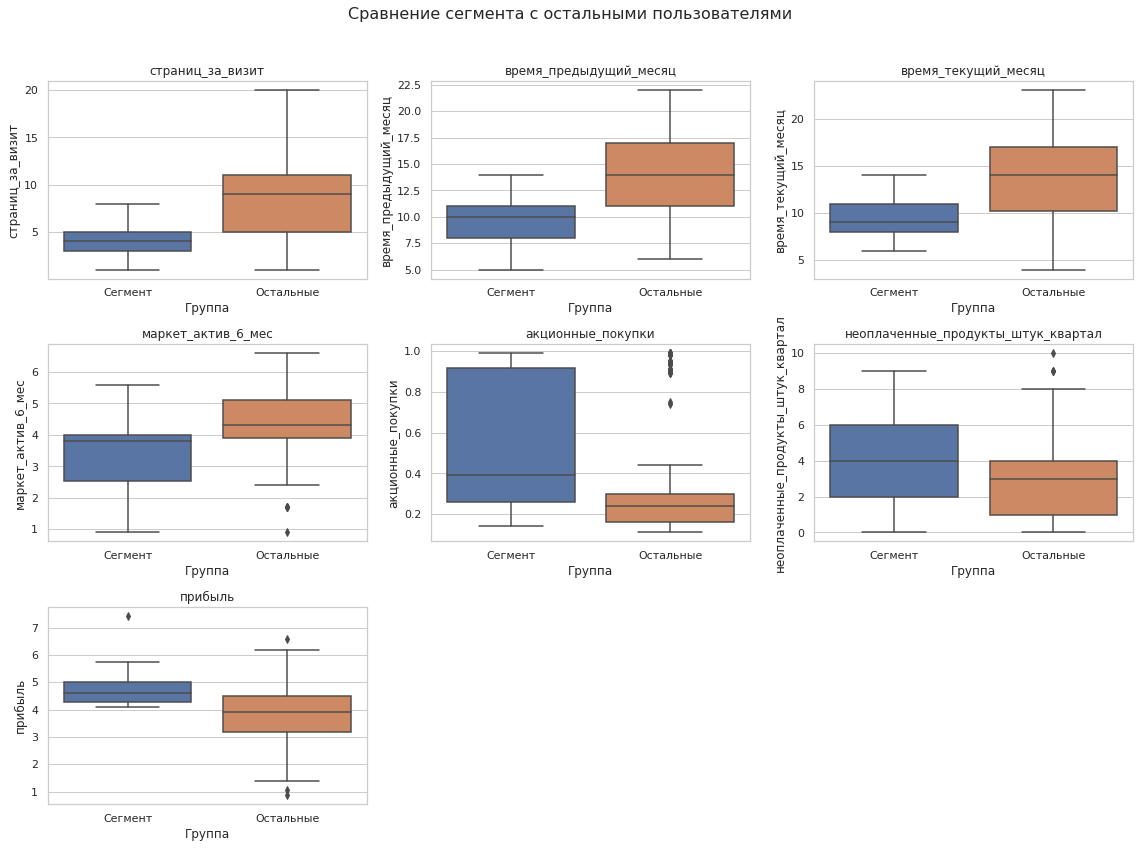

In [53]:
# Подготовим нужные переменные
segment = segment_high_risk_high_value.copy()
others = df_preds[~df_preds.index.isin(segment.index)]

# Укажем числовые признаки для сравнения
features_to_plot = [
    'страниц_за_визит', 'время_предыдущий_месяц', 'время_текущий_месяц',
    'маркет_актив_6_мес', 'акционные_покупки', 'неоплаченные_продукты_штук_квартал',
    'прибыль'
]

# Построим boxplot для каждого признака: сравнение сегмента и остальных
n_cols = 3
n_rows = (len(features_to_plot) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))

for i, feature in enumerate(features_to_plot):
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    sns.boxplot(data=pd.concat([
        segment.assign(Группа='Сегмент'),
        others.assign(Группа='Остальные')
    ]), x='Группа', y=feature, ax=ax)
    ax.set_title(f'{feature}')

# Удалим лишние подграфики
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

fig.suptitle('Сравнение сегмента с остальными пользователями', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Были выделены пользователи, у которых модель предсказала снижение покупательской активности, несмотря на высокую прибыль. В сегмент вошли 39 клиентов.


Профиль сегмента отличается от остальных пользователей по ряду признаков:
- Меньше страниц за визит и меньше времени на сайте, что говорит о снижении интереса или мотивации к изучению ассортимента.
- Ниже маркетинговая активность за 6 месяцев - возможно, пользователи теряют вовлечённость.
- Выше доля акционных покупок - клиенты более чувствительны к скидкам.
- Больше неоплаченных товаров - возможный индикатор неудовлетворённости сервисом или низкой лояльности.
- Несмотря на это, средняя прибыль по сегменту выше, чем у остальных клиентов.

Предложения по удержанию:
- Запустить персональные маркетинговые кампании с акцентом на скидки и ограниченные предложения.
- Упростить процесс оплаты и устранить барьеры, чтобы снизить число неоплаченных заказов.
- Ввести мотивацию к просмотру ассортимента (например, персонализированные подборки, рекомендации, геймификация).
- Провести опрос или интервью для уточнения причин снижения вовлечённости у этой группы.

Сегмент высокодоходных, но теряющих активность пользователей представляет ценность для бизнеса. Предпринятые меры могут способствовать увеличению удержания и выручки, особенно за счёт более точечного маркетинга и повышения удобства сервиса.

## Общий вывод

В рамках проекта была решена задача прогнозирования снижения покупательской активности на основе поведенческих и транзакционных данных. Целью работы стало не только построение модели классификации, но и последующая сегментация клиентов для выработки рекомендаций по удержанию.

В распоряжении находились четыре датасета: с поведенческими признаками, историей выручки, временем, проведённым на сайте, и информацией о прибыли. Проведена первичная предобработка: стандартизированы названия признаков, приведены типы данных, обработаны явные выбросы. В рамках EDA выявлены ключевые закономерности и подтверждена корректность данных. После этого таблицы были объединены в один датафрейм с отдельными признаками для каждого временного периода.

Для построения модели использовался единый пайплайн с `GridSearchCV`, где перебирались четыре алгоритма: логистическая регрессия, дерево решений, метод опорных векторов и K-ближайших соседей. В сетке перебирались не только гиперпараметры моделей, но и способы кодирования категориальных признаков, масштабирования числовых, а также методы борьбы с дисбалансом классов (включая SMOTE). В качестве метрики была выбрана `f1`, так как классы неравномерны и важно учитывать качество предсказания для обеих категорий.

Наилучшей моделью по итогам перебора стал `KNeighborsClassifier` с параметрами `n_neighbors=9`, `metric='manhattan'`, `weights='distance'`, использующий `OneHotEncoder`, `StandardScaler` и без применения сэмплинга. Модель показала F1 0.85 на кросс-валидации и 0.86 на тестовой выборке, что говорит о её стабильности и высоком качестве. Интерпретация модели с использованием SHAP позволила выделить наиболее значимые признаки: количество страниц за визит, время, проведённое на сайте, и глубина маркетингового взаимодействия.

Дополнительно был проведён анализ сегмента пользователей, для которых модель прогнозирует снижение активности при высокой прибыли. У этой группы выявлены особенности: меньшая вовлечённость в изучение сайта, повышенная чувствительность к скидкам и больше неоплаченных заказов. На основе этих данных предложены меры для повышения удержания - персонализированные скидки, повышение удобства интерфейса и таргетированные рекомендации.